In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드

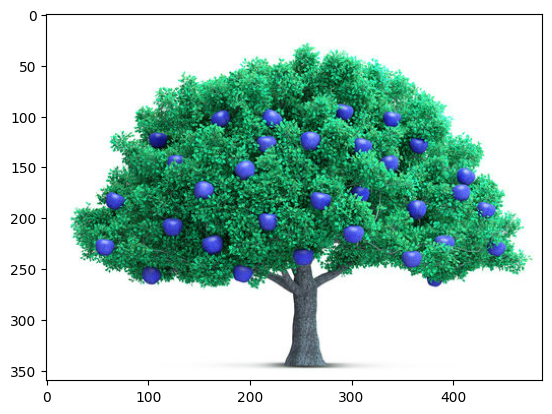

In [7]:
image = cv2.imread('sample.jpg') # 분석할 이미지 파일
plt.imshow(image)

# 기존 RGB으로 구성된 수치를 CV는 BGR로 받고 있기 때문에 B와 R이 바뀌어 보임
# -> R(빨강)이 B(파랑)으로 보임 

# BGR에서 HSV 색상 공간으로 변환

HSV 는 Hue(색상), Saturation(채도), Value(명도) 의 약자 /n
OpenCV는 BGR 순서로 픽셀값을 찾기 때문에 '빨강' 을 찾으려면 0,0,255 뿐만 아니라 10,10,200 도 고려하는 등 고려해야 할 요소가 많음

### HSV에서는 
Hue에서 "빨강" 영역을 한정된 값으로 잡아서 쉽게 색을 검출 가능


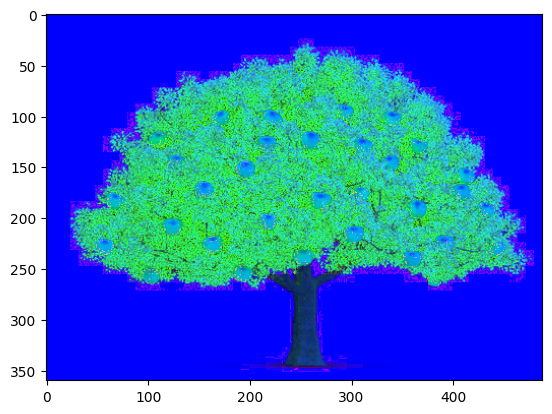

In [8]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

# imshow가 HSV의 넘파이 배열을 RGB로 해석해서 보여주니 색이 이상하게 보임

In [9]:
# 빨간색 범위 지정 (두 개의 범위를 설정해야 함)
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
# 마스크 생성
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = mask1 + mask2 # 두 개의 마스크를 합침

In [10]:
# 원본 이미지에서 빨간색 부분만 추출
result = cv2.bitwise_and(image, image, mask=mask)
# 결과 이미지 출력
cv2.imshow('Original', image)
cv2.imshow('Red Filtered', result)
cv2.waitKey(0)
cv2.destroyAllWindows()
# ✅실행 결과: 빨간색 영역이 검출되며, 다른 색상은 제거된 상태로 표시됨.